In [20]:
import pandas as pd

df = pd.read_csv("../data/split/train.csv", index_col=0)

In [3]:
df.head()

,Logfile,Date,Time,Pid,Level,Component,Context,Content,EventId,EventTemplate,ParameterList,Label
LineId,,,,,,,,,,,,
42784,nova-api.log.1.2017-05-17_12:02:19,2017-05-16,20:32:42.050,25749,INFO,nova.osapi_compute.wsgi.server,req-1058e159-c78a-4a6a-8318-debb27d4b74d 113d3...,"10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.10.1', '/v2/54fadb412c4e40cdbaed9335e4...",0
46279,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,05:40:24.794,25746,INFO,nova.osapi_compute.wsgi.server,req-0aff65e0-c300-4e97-99e8-3e551dfe5fd1 113d3...,"10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.10.1', '/v2/54fadb412c4e40cdbaed9335e4...",0
134209,nova-compute.log.2017-05-17_12:02:35,2017-05-17,10:56:00.389,2931,INFO,nova.virt.libvirt.imagecache,req-addc1839-2ed5-4778-b57e-5854eb7b8b09 - - -...,image 0673dd71-34c5-4fbb-86c4-40623fbe45b4 at ...,1ea73ca5,image <*> at (<*>): in use: on this node <*> l...,"['0673dd71-34c5-4fbb-86c4-40623fbe45b4', '/var...",0
37697,nova-api.log.1.2017-05-16_13:53:08,2017-05-16,04:37:24.068,25788,INFO,nova.metadata.wsgi.server,-,"10.11.23.10,10.11.10.1 ""GET /openstack/2013-10...",c1d6825f,"<*> ""GET <*> HTTP<*>"" status: <*> len: <*> tim...","['10.11.23.10,10.11.10.1', '/openstack/2013-10...",0
24126,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,02:57:32.870,2931,INFO,nova.virt.libvirt.driver,-,[instance: 73f6379e-c2af-471d-bbda-ae04c974463...,899b89e9,[instance: <*>] Instance <*> successfully.,"['73f6379e-c2af-471d-bbda-ae04c9744631', 'dest...",0


In [27]:
df["datetime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    errors="coerce"
)

df["is_weekend"] = df["datetime"].dt.weekday.isin([5, 6]).astype(int)

df["time_of_day"] = df["datetime"].dt.hour.apply(
    lambda h: "working_hours" if 8 <= h < 18 else "off_hours"
)

df[["Date", "Time", "is_weekend", "time_of_day"]].head()

,Date,Time,is_weekend,time_of_day
LineId,,,,
42784,2017-05-16,20:32:42.050,0,off_hours
46279,2017-05-16,05:40:24.794,0,off_hours
134209,2017-05-17,10:56:00.389,0,working_hours
37697,2017-05-16,04:37:24.068,0,off_hours
24126,2017-05-16,02:57:32.870,0,off_hours


In [28]:
print(df["is_weekend"].value_counts())

print(df["time_of_day"].value_counts())

is_weekend
0    132441
1     12904
Name: count, dtype: int64
time_of_day
off_hours        122854
working_hours     22491
Name: count, dtype: int64


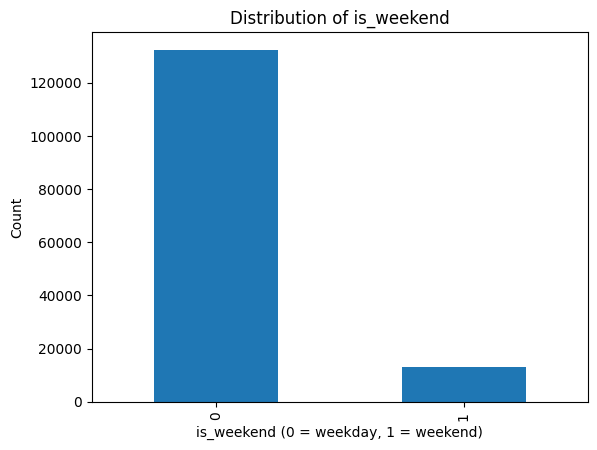

In [29]:
import matplotlib.pyplot as plt

df["is_weekend"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("is_weekend (0 = weekday, 1 = weekend)")
plt.ylabel("Count")
plt.title("Distribution of is_weekend")
plt.show()

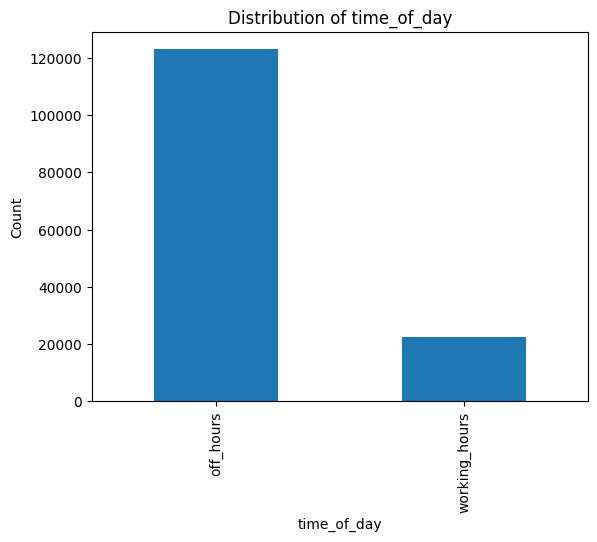

In [30]:
df["time_of_day"].value_counts().plot(kind="bar")
plt.xlabel("time_of_day")
plt.ylabel("Count")
plt.title("Distribution of time_of_day")
plt.show()


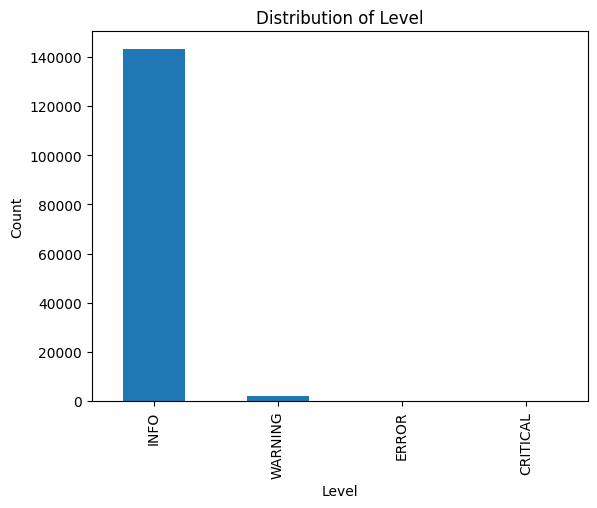

In [41]:
df["Level"].value_counts().plot(kind="bar")
plt.xlabel("Level")
plt.ylabel("Count")
plt.title("Distribution of Level")
plt.show()


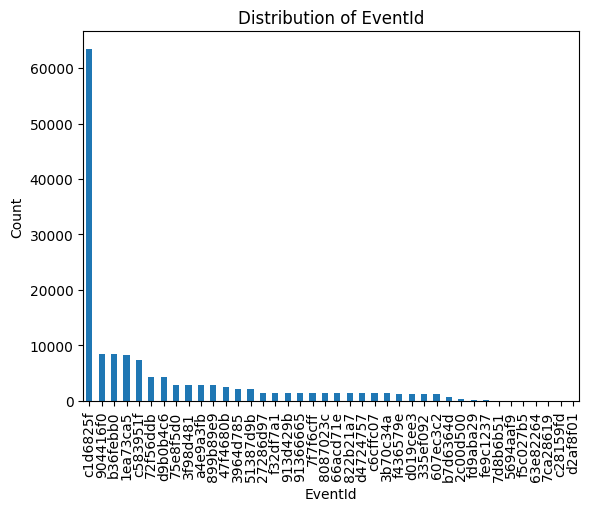

In [42]:
df["EventId"].value_counts().plot(kind="bar")
plt.xlabel("EventId")
plt.ylabel("Count")
plt.title("Distribution of EventId")
plt.show()


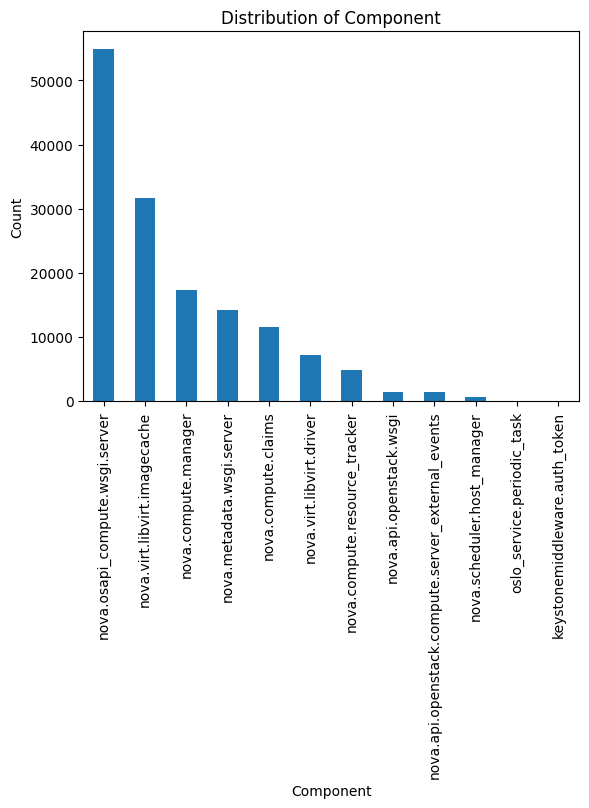

In [43]:
df["Component"].value_counts().plot(kind="bar")
plt.xlabel("Component")
plt.ylabel("Count")
plt.title("Distribution of Component")
plt.show()


In [25]:
pd.crosstab(df["is_weekend"], df["Label"], normalize="index")


Label,0,1
is_weekend,,
0,1.0,0.0
1,0.0,1.0


In [31]:
pd.crosstab(df["time_of_day"], df["Label"], normalize="index")

Label,0,1
time_of_day,,
off_hours,0.894965,0.105035
working_hours,1.000000,0.000000


In [44]:
pd.crosstab(df["Level"], df["Label"], normalize="index")

Label,0,1
Level,,
CRITICAL,1.000000,0.000000
ERROR,1.000000,0.000000
INFO,0.911173,0.088827
WARNING,0.913801,0.086199


In [45]:
pd.crosstab(df["EventId"], df["Label"], normalize="index")

Label,0,1
EventId,,
1ea73ca5,0.938113,0.061887
27286d97,0.909465,0.090535
2c00d500,0.919444,0.080556
335ef092,0.926230,0.073770
3964d785,0.914747,0.085253
3b70c34a,0.904594,0.095406
3f98d481,0.905817,0.094183
47f4680b,1.000000,0.000000
51387d9b,0.913511,0.086489


In [46]:
pd.crosstab(df["Component"], df["Label"], normalize="index")

Label,0,1
Component,,
keystonemiddleware.auth_token,1.000000,0.000000
nova.api.openstack.compute.server_external_events,0.904594,0.095406
nova.api.openstack.wsgi,0.903068,0.096932
nova.compute.claims,0.906320,0.093680
nova.compute.manager,0.905450,0.094550
nova.compute.resource_tracker,0.923330,0.076670
nova.metadata.wsgi.server,0.906432,0.093568
nova.osapi_compute.wsgi.server,0.903814,0.096186
nova.scheduler.host_manager,0.921600,0.078400


In [ ]:
def row_to_transaction(row):
    return [
        f"Level={row['Level']}",
        f"Component={row['Component']}",
        f"EventId={row['EventId']}",
        f"time_of_day={row['time_of_day']}",
        f"is_weekend={row['is_weekend']}",
        f"Label={row['Label']}"
    ]

transactions = df.apply(row_to_transaction, axis=1).tolist()

transactions[:2]

[['Level=INFO',
  'Component=nova.osapi_compute.wsgi.server',
  'EventId=c1d6825f',
  'time_of_day=off_hours',
  'is_weekend=0',
  'Label=0'],
 ['Level=INFO',
  'Component=nova.osapi_compute.wsgi.server',
  'EventId=c1d6825f',
  'time_of_day=off_hours',
  'is_weekend=0',
  'Label=0']]

In [35]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

In [36]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(
    df_te,
    min_support=0.01,   # điều chỉnh theo size data
    use_colnames=True
)


In [37]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6
)

# Chỉ lấy rule có hậu quả là Label=1
error_rules = rules[
    rules["consequents"].apply(lambda x: "Label=1" in x)
]

error_rules = error_rules.sort_values(
    by=["confidence", "lift"],
    ascending=False
)


In [38]:
error_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1406,"(Component=nova.osapi_compute.wsgi.server, is_...","(Level=INFO, Label=1)",0.036320,0.087488,0.036320,1.0,11.430088,1.0,0.033143,inf,0.946904,0.415146,1.0,0.707573
2199,"(EventId=c1d6825f, is_weekend=1)","(Level=INFO, Label=1)",0.041776,0.087488,0.041776,1.0,11.430088,1.0,0.038122,inf,0.952295,0.477509,1.0,0.738754
2883,"(Component=nova.osapi_compute.wsgi.server, is_...","(Label=1, Level=INFO)",0.032598,0.087488,0.032598,1.0,11.430088,1.0,0.029746,inf,0.943260,0.372601,1.0,0.686301
3051,"(time_of_day=off_hours, Component=nova.osapi_c...","(Label=1, Level=INFO)",0.036320,0.087488,0.036320,1.0,11.430088,1.0,0.033143,inf,0.946904,0.415146,1.0,0.707573
3056,"(Component=nova.osapi_compute.wsgi.server, is_...","(time_of_day=off_hours, Level=INFO, Label=1)",0.036320,0.087488,0.036320,1.0,11.430088,1.0,0.033143,inf,0.946904,0.415146,1.0,0.707573
3788,"(time_of_day=off_hours, EventId=c1d6825f, is_w...","(Label=1, Level=INFO)",0.041776,0.087488,0.041776,1.0,11.430088,1.0,0.038122,inf,0.952295,0.477509,1.0,0.738754
3793,"(EventId=c1d6825f, is_weekend=1)","(time_of_day=off_hours, Level=INFO, Label=1)",0.041776,0.087488,0.041776,1.0,11.430088,1.0,0.038122,inf,0.952295,0.477509,1.0,0.738754
4105,"(time_of_day=off_hours, Component=nova.osapi_c...","(Label=1, Level=INFO)",0.032598,0.087488,0.032598,1.0,11.430088,1.0,0.029746,inf,0.943260,0.372601,1.0,0.686301
4122,"(Component=nova.osapi_compute.wsgi.server, is_...","(time_of_day=off_hours, Level=INFO, Label=1)",0.032598,0.087488,0.032598,1.0,11.430088,1.0,0.029746,inf,0.943260,0.372601,1.0,0.686301
113,(is_weekend=1),(Label=1),0.088782,0.088782,0.088782,1.0,11.263562,1.0,0.080900,inf,1.000000,1.000000,1.0,1.000000


In [40]:
important_features = (
    error_rules["antecedents"]
    .explode()
    .value_counts()
)
important_features

antecedents
is_weekend=1                                72
Component=nova.osapi_compute.wsgi.server    27
EventId=c1d6825f                            27
time_of_day=off_hours                       24
Level=INFO                                  24
Component=nova.compute.manager               9
Component=nova.virt.libvirt.imagecache       9
Name: count, dtype: int64